# House Price Prediction - Exploratory Data Analysis
    
This notebook performs exploratory data analysis on the Ames Housing dataset to understand the data structure, identify patterns, and prepare for model building.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
import sys
import os
sys.path.append('..')
from src.data.loader import load_train_data, load_test_data, get_feature_groups
from src.data.preprocessor import identify_missing_values
from src.visualization.plots import (
    configure_plot_style, plot_missing_values, plot_distribution,
    plot_categorical_distribution, plot_correlation_matrix,
    plot_pairplot, plot_boxplots, plot_feature_importance
)

In [2]:
# Configure plot style
configure_plot_style()

# Load the data
train_df = load_train_data()
test_df = load_test_data()

Loading training data from C:\Users\sem_w\OneDrive\Documents\portfolio_projects\House-Prices-Predictions\Data\train.csv
Loading test data from C:\Users\sem_w\OneDrive\Documents\portfolio_projects\House-Prices-Predictions\Data\test.csv


## 1. Data Overview

Let's start by examining the basic structure of the dataset.

In [3]:
# Display basic information about the training dataset
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Display the first few rows of the training data
train_df.head()

Training data shape: (1460, 81)
Test data shape: (1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Get summary statistics for numeric columns
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# Get summary of categorical columns
train_df.describe(include=['object']).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [6]:
# Check data types and non-null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Missing Value Analysis

Let's identify and visualize missing values in the dataset.

In [7]:
# Identify missing values
missing_info = identify_missing_values(train_df)
print(f"Found {len(missing_info)} features with missing values")
missing_info

Found 19 features with missing values


Missing Values  Missing Percentage
PoolQC                  1453               99.52
MiscFeature             1406               96.30
Alley                   1369               93.77
Fence                   1179               80.75
MasVnrType               872               59.73
FireplaceQu              690               47.26
LotFrontage              259               17.74
GarageType                81                5.55
GarageYrBlt               81                5.55
GarageFinish              81                5.55
GarageQual                81                5.55
GarageCond                81                5.55
BsmtExposure              38                2.60
BsmtFinType2              38                2.60
BsmtQual                  37                2.53
BsmtCond                  37                2.53
BsmtFinType1              37                2.53
MasVnrArea                 8                0.55
Electrical                 1                0.07

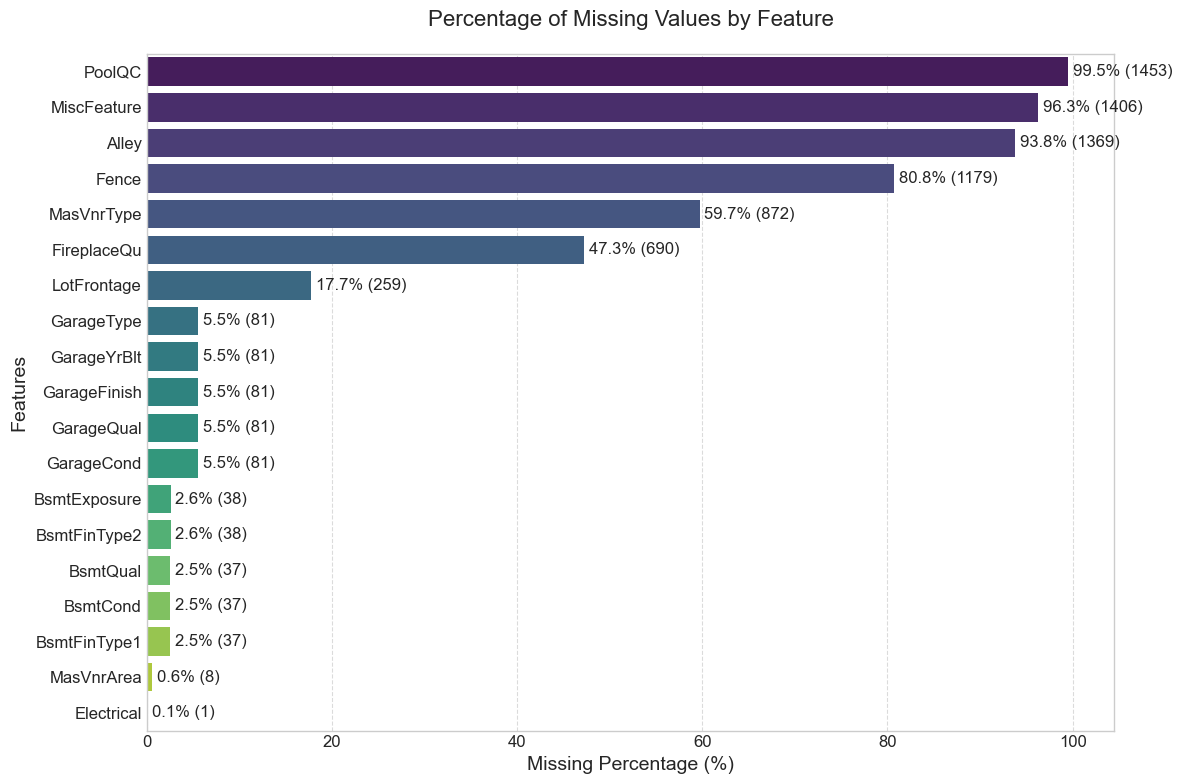

In [8]:
# Plot missing values
if not missing_info.empty:
    fig = plot_missing_values(missing_info)
    plt.show()

### Analysis of Missing Values

Let's analyze the patterns of missing values to understand if they're missing at random or if there's a systematic pattern.

In [9]:
# For features with high missing percentages, let's check if they're related to specific house types
high_missing_features = missing_info[missing_info['Missing Percentage'] > 50].index.tolist()

if high_missing_features:
    print("Features with high missing percentages:")
    for feature in high_missing_features:
        # Check if the feature exists in the dataframe
        if feature in train_df.columns:
            # Count non-missing values by house type
            if 'BldgType' in train_df.columns:
                missing_by_type = train_df.groupby('BldgType')[feature].apply(lambda x: x.notna().sum())
                total_by_type = train_df.groupby('BldgType').size()
                pct_by_type = (missing_by_type / total_by_type * 100).round(2)
                
                print(f"\n{feature} - Percentage of non-missing values by building type:")
                print(pct_by_type)

Features with high missing percentages:

PoolQC - Percentage of non-missing values by building type:
BldgType
1Fam      0.57
2fmCon    0.00
Duplex    0.00
Twnhs     0.00
TwnhsE    0.00
dtype: float64

MiscFeature - Percentage of non-missing values by building type:
BldgType
1Fam      4.02
2fmCon    6.45
Duplex    5.77
Twnhs     0.00
TwnhsE    0.00
dtype: float64

Alley - Percentage of non-missing values by building type:
BldgType
1Fam       5.16
2fmCon    22.58
Duplex     3.85
Twnhs     11.63
TwnhsE    12.28
dtype: float64

Fence - Percentage of non-missing values by building type:
BldgType
1Fam      21.89
2fmCon    12.90
Duplex     5.77
Twnhs      6.98
TwnhsE     3.51
dtype: float64

MasVnrType - Percentage of non-missing values by building type:
BldgType
1Fam      38.52
2fmCon    12.90
Duplex    44.23
Twnhs     69.77
TwnhsE    53.51
dtype: float64


## 3. Target Variable Analysis

Let's analyze the distribution of the target variable (SalePrice).

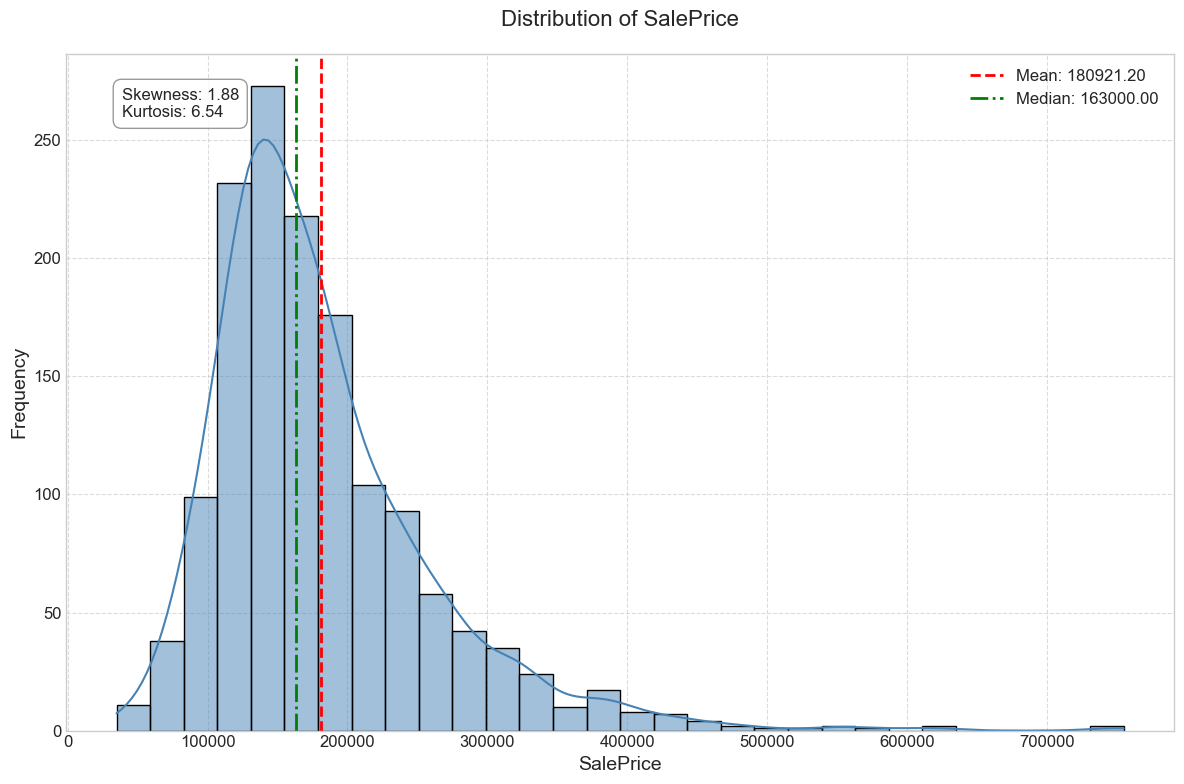

In [10]:
# Plot distribution of target variable
fig = plot_distribution(train_df, 'SalePrice')
plt.show()

In [11]:
# Calculate descriptive statistics for SalePrice
sale_price_stats = train_df['SalePrice'].describe()
print(sale_price_stats)

# Calculate additional statistics
print(f"\nSkewness: {train_df['SalePrice'].skew():.4f}")
print(f"Kurtosis: {train_df['SalePrice'].kurtosis():.4f}")

# Check for outliers using IQR method
Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_df[(train_df['SalePrice'] < lower_bound) | (train_df['SalePrice'] > upper_bound)]
print(f"\nNumber of outliers in SalePrice: {len(outliers)}")

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8829
Kurtosis: 6.5363

Number of outliers in SalePrice: 61


In [12]:
# Apply log transformation to SalePrice
train_df['LogSalePrice'] = np.log1p(train_df['SalePrice'])

# Plot distribution of log-transformed target variable
fig = plot_distribution(train_df, 'LogSalePrice')
plt.show()

# Calculate statistics for log-transformed SalePrice
print(f"Skewness of LogSalePrice: {train_df['LogSalePrice'].skew():.4f}")
print(f"Kurtosis of LogSalePrice: {train_df['LogSalePrice'].kurtosis():.4f}")

Skewness of LogSalePrice: 0.1213
Kurtosis of LogSalePrice: 0.8095


## 4. Numerical Features Analysis

Let's analyze the distribution of important numerical features and their relationship with the target variable.

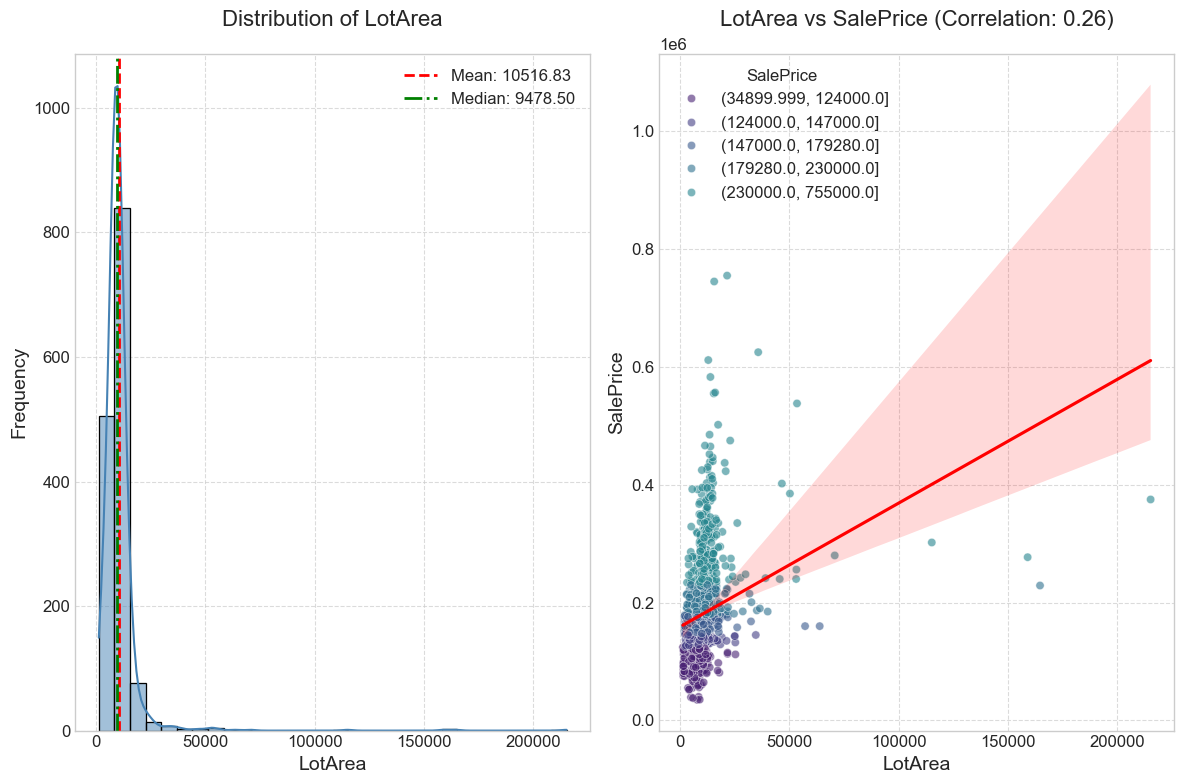

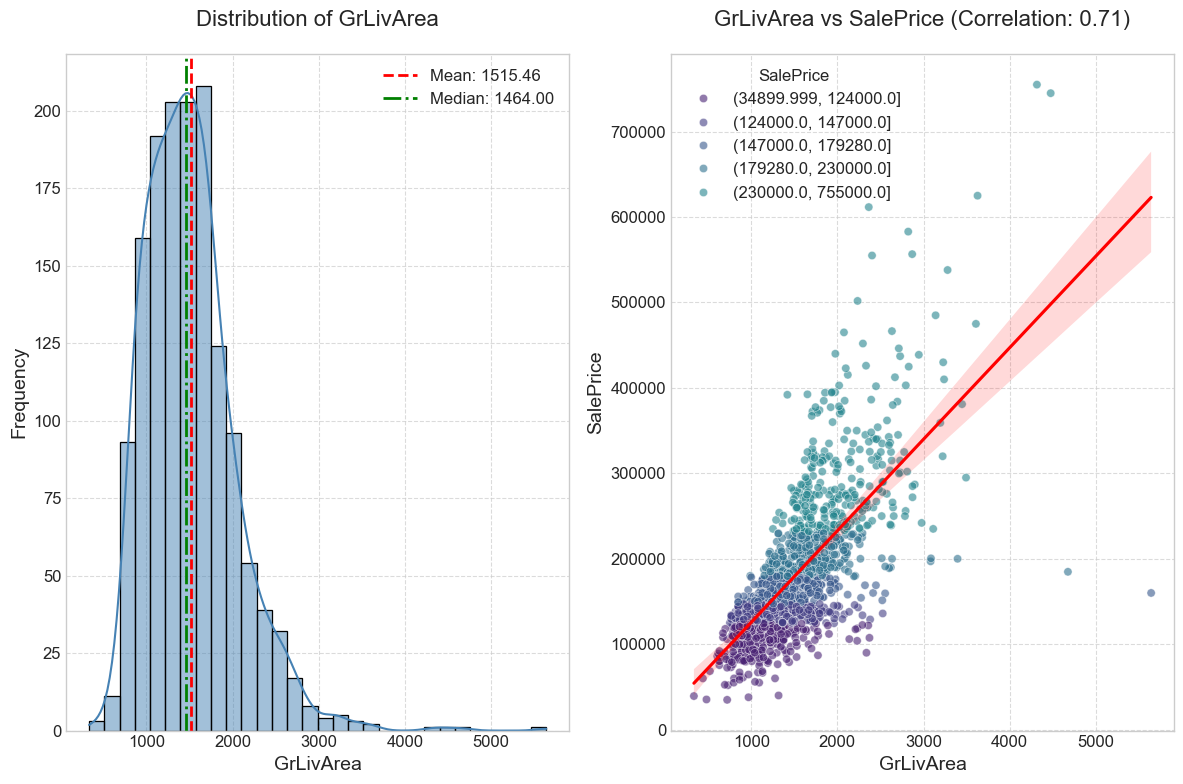

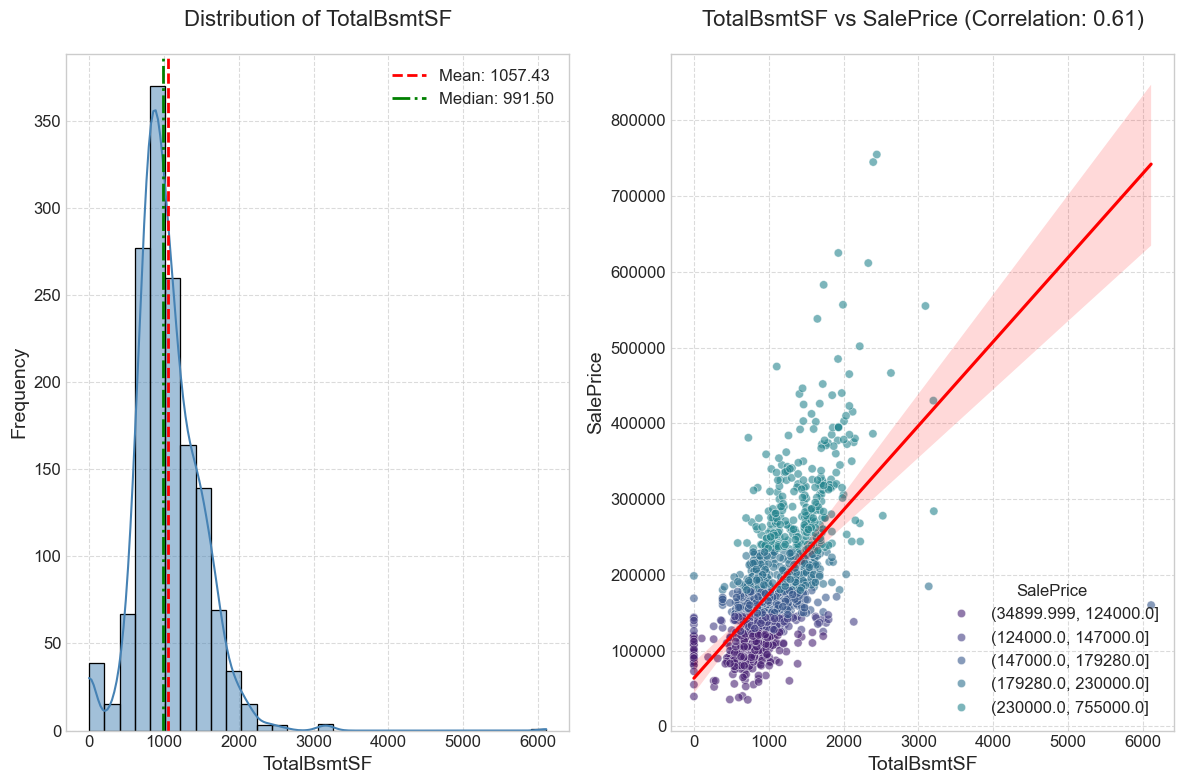

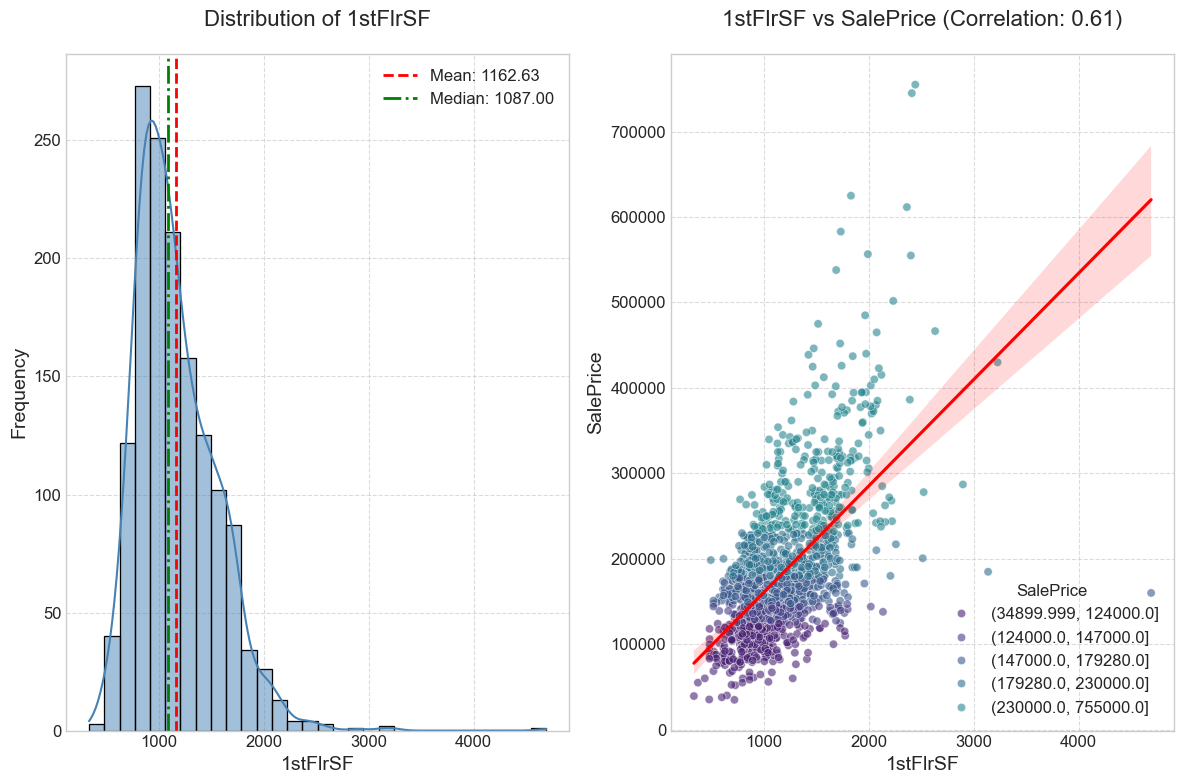

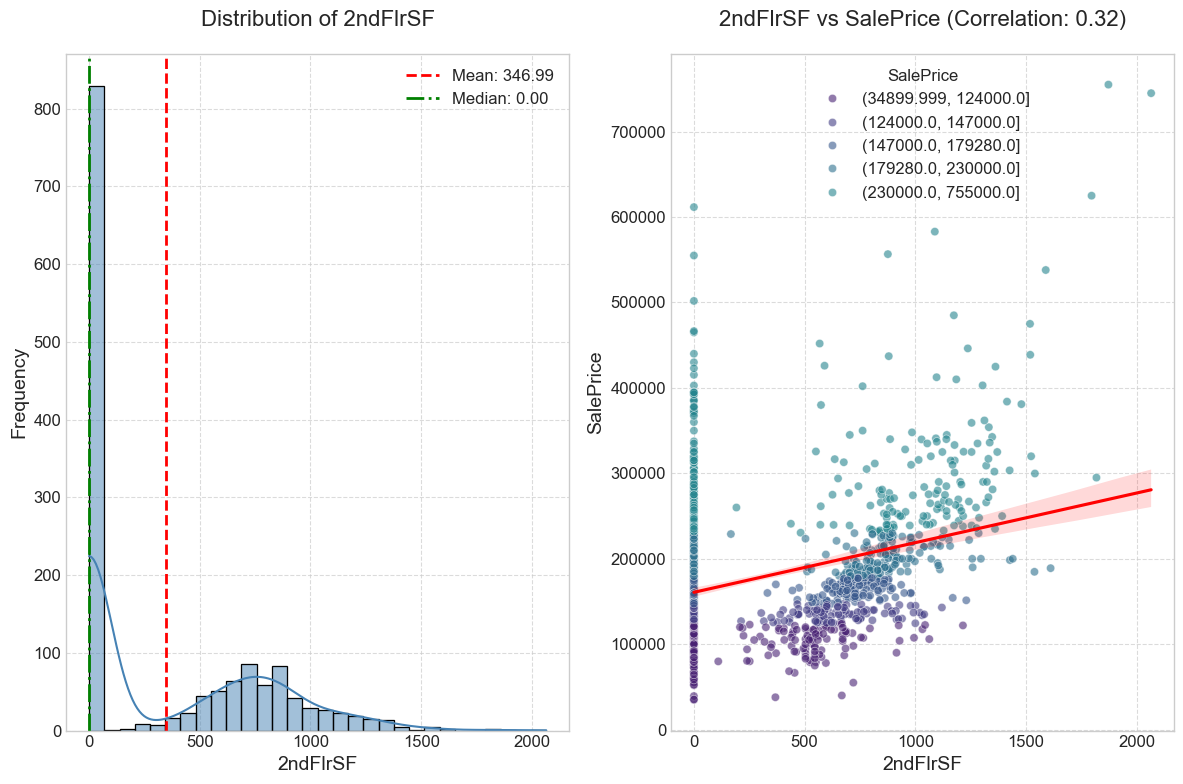

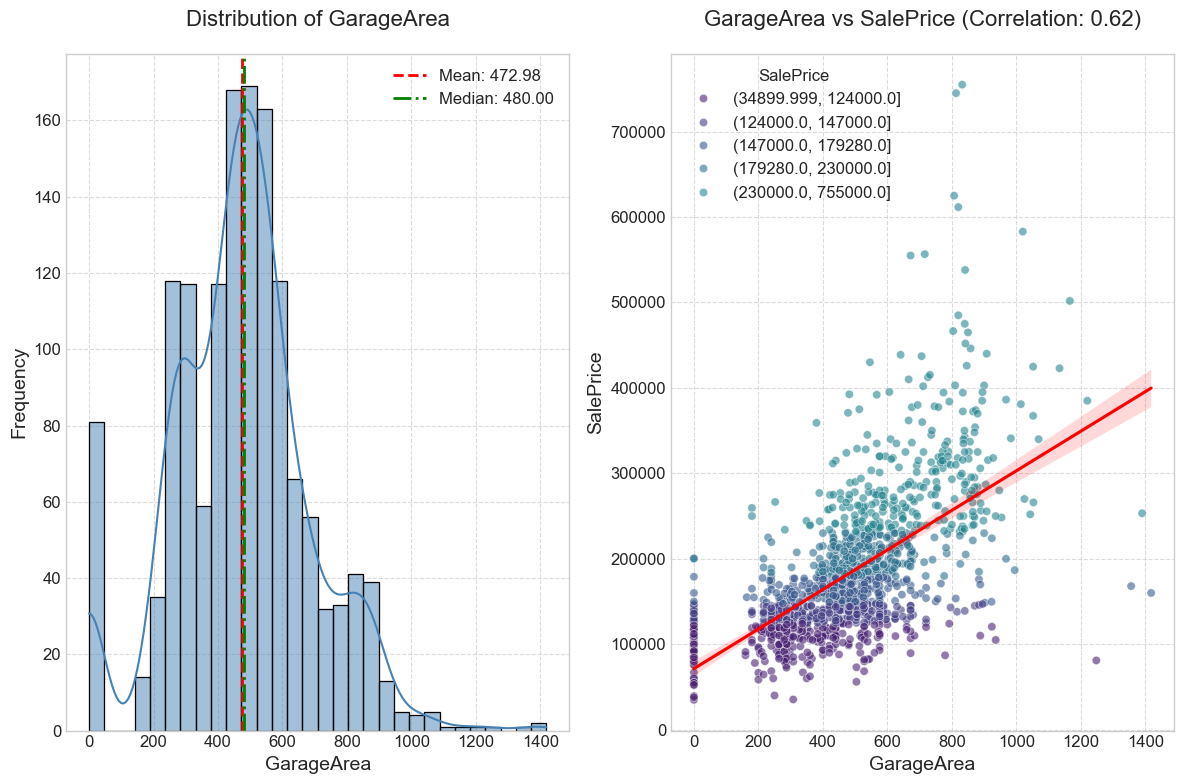

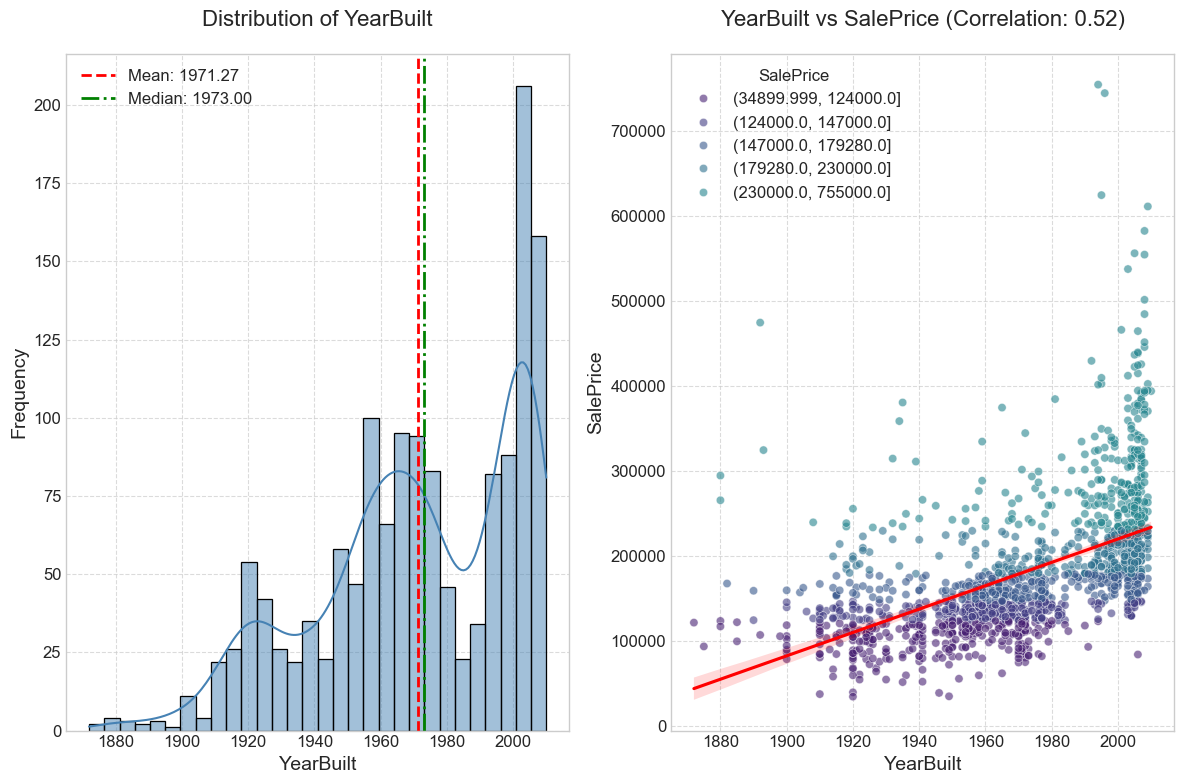

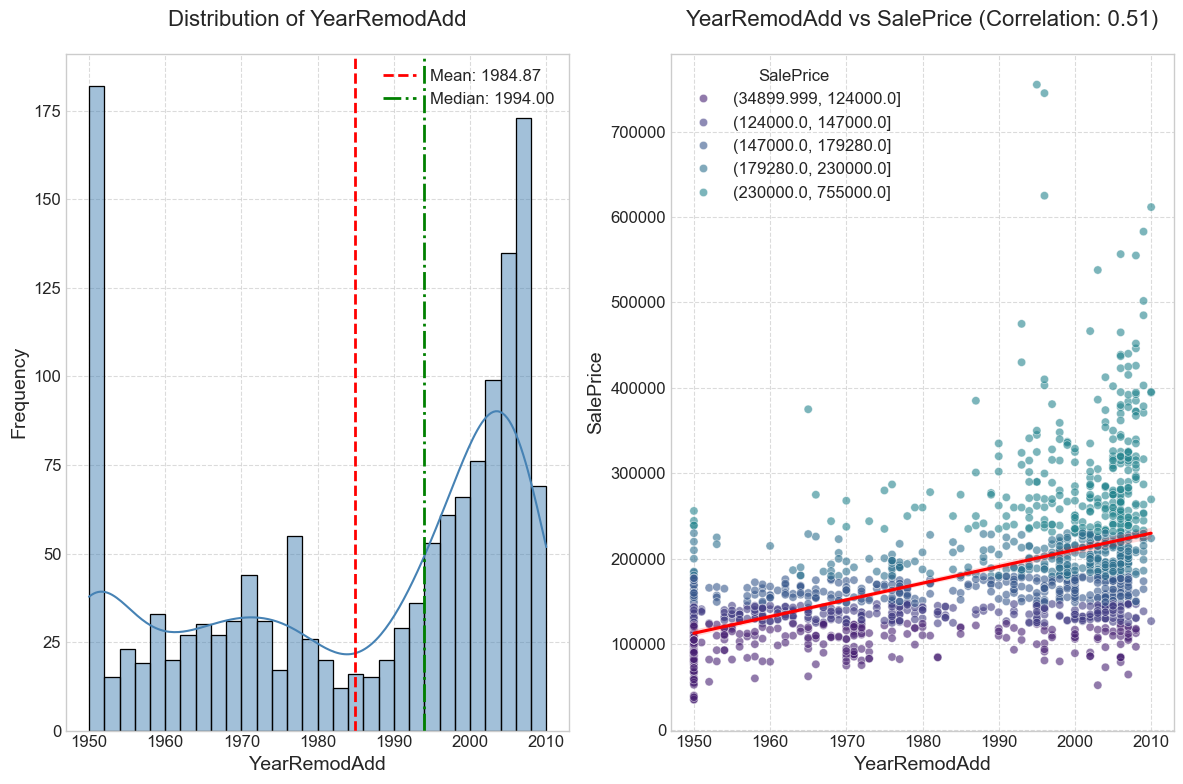

In [13]:
# Select important numerical features
important_numeric_features = [
    'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
    'GarageArea', 'YearBuilt', 'YearRemodAdd', 'OverallQual'
]

# Filter to only include features that exist in the dataframe
numeric_features = [col for col in important_numeric_features if col in train_df.columns]

# Plot distribution of each numeric feature with relation to SalePrice
for feature in numeric_features:
    fig = plot_distribution(train_df, feature, target_column='SalePrice')
    plt.show()

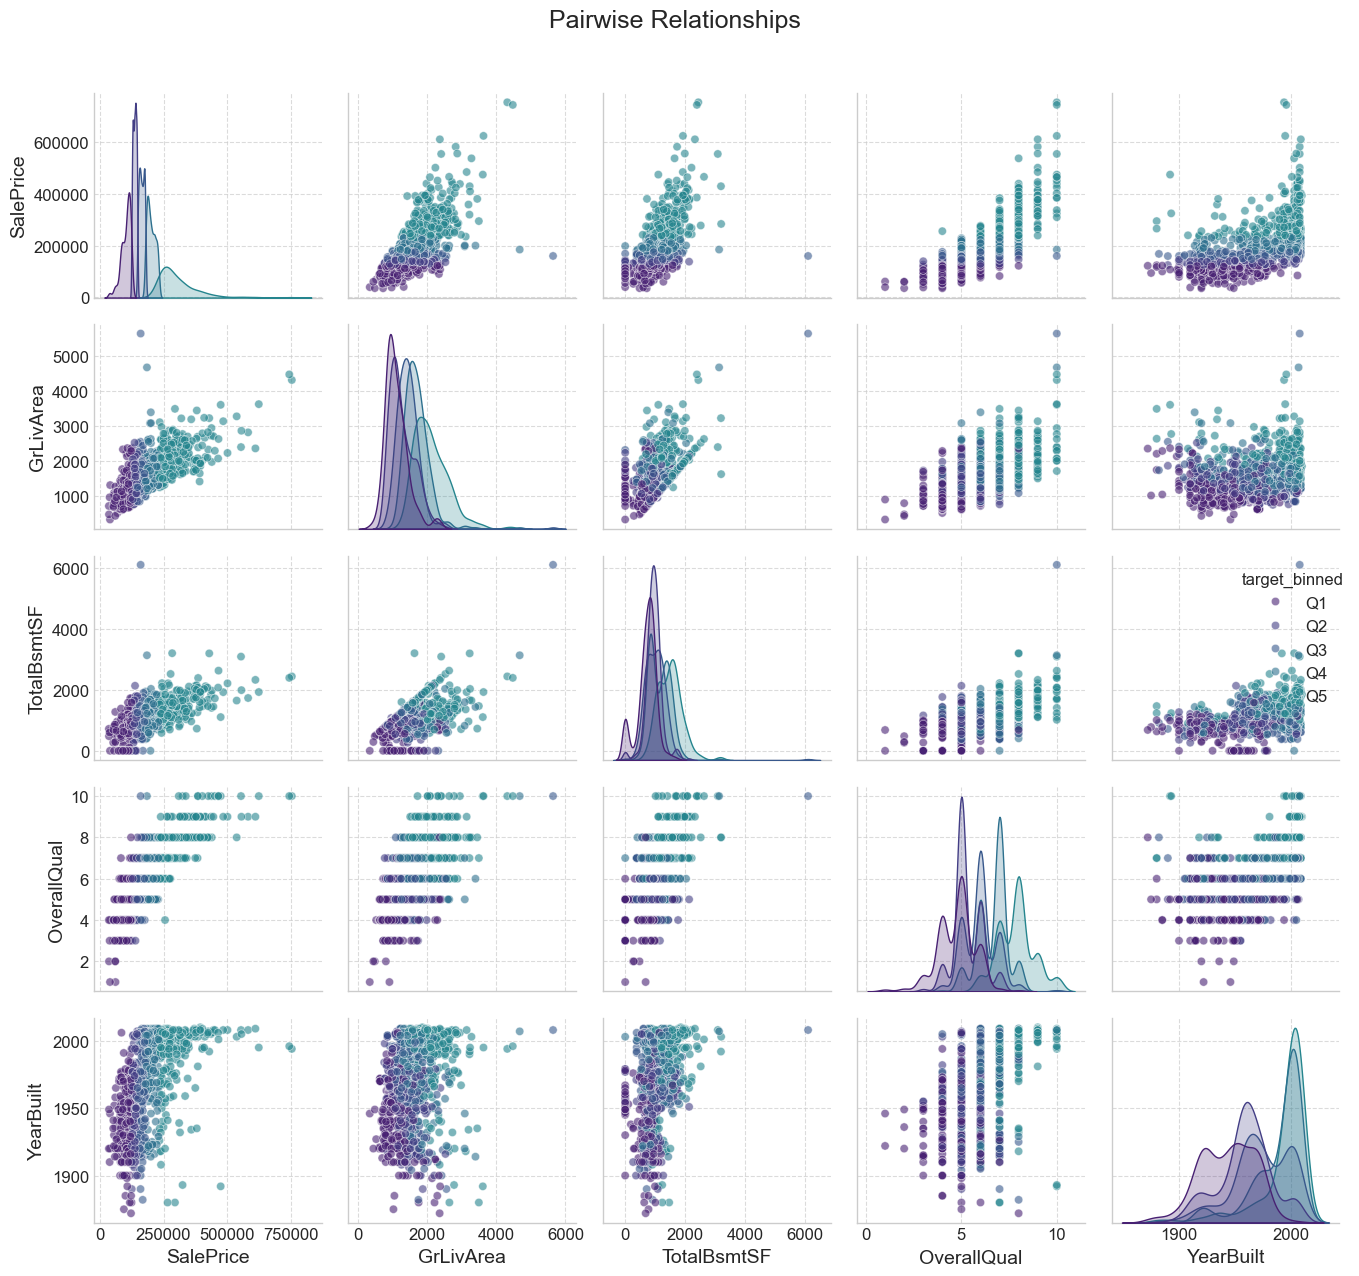

In [14]:
# Create a pairplot for selected numeric features
selected_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']
selected_features = [col for col in selected_features if col in train_df.columns]

fig = plot_pairplot(train_df, selected_features, target_column='SalePrice')
plt.show()

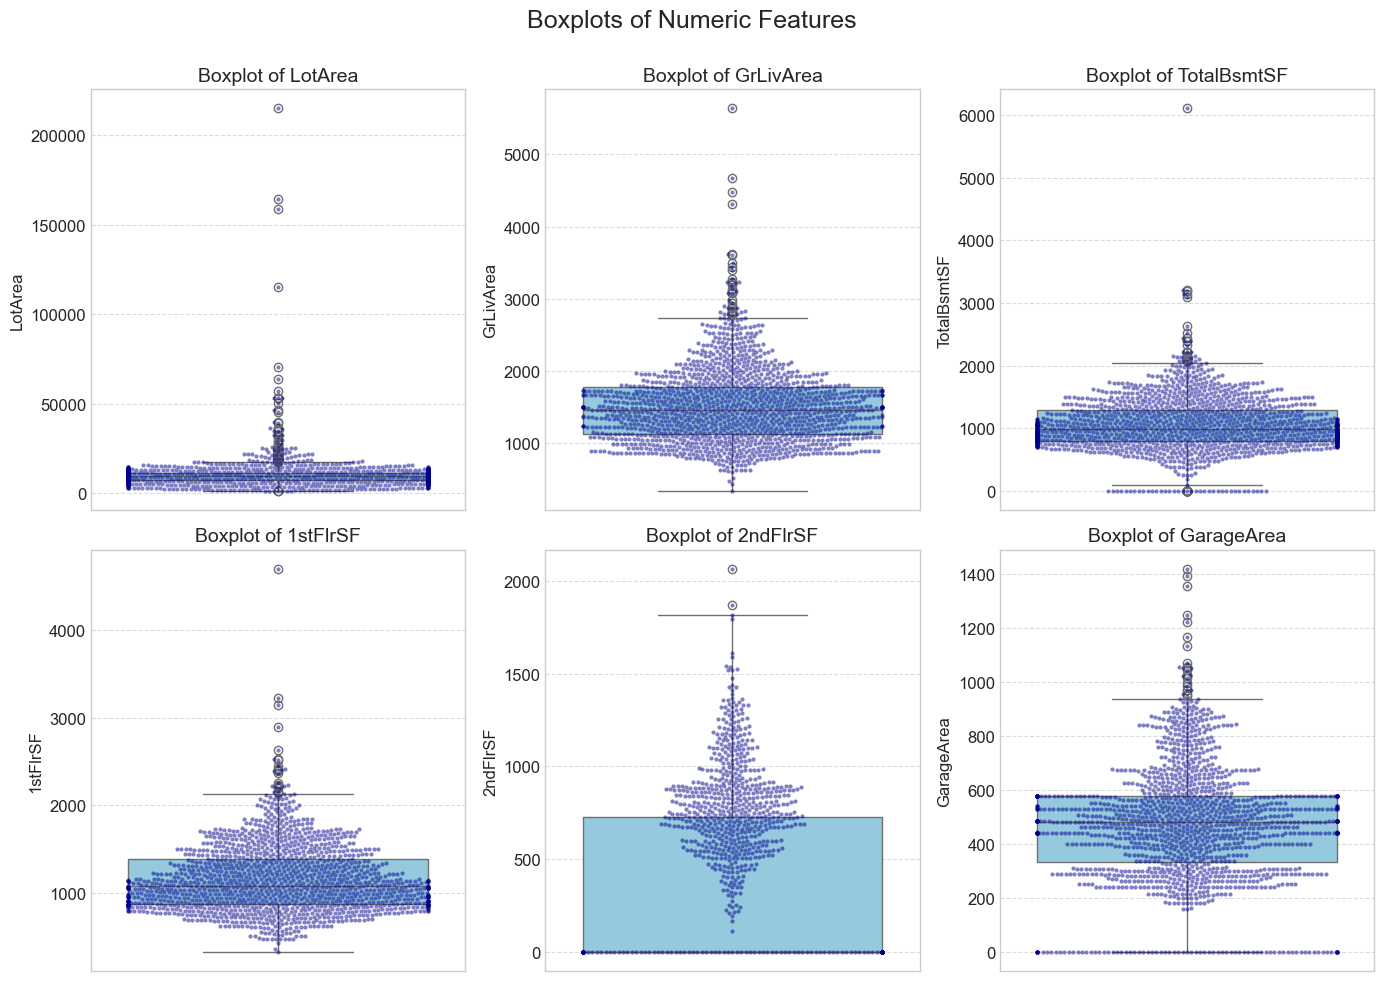

In [15]:
# Create boxplots for numeric features
fig = plot_boxplots(train_df, numeric_features[:6])  # Limit to 6 features for readability
plt.show()

In [16]:
# Calculate correlation with SalePrice
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

print("Top 15 features positively correlated with SalePrice:")
print(correlations.head(15))

print("\nTop 15 features negatively correlated with SalePrice:")
print(correlations.tail(15))

Top 15 features positively correlated with SalePrice:
SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

Top 15 features negatively correlated with SalePrice:
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


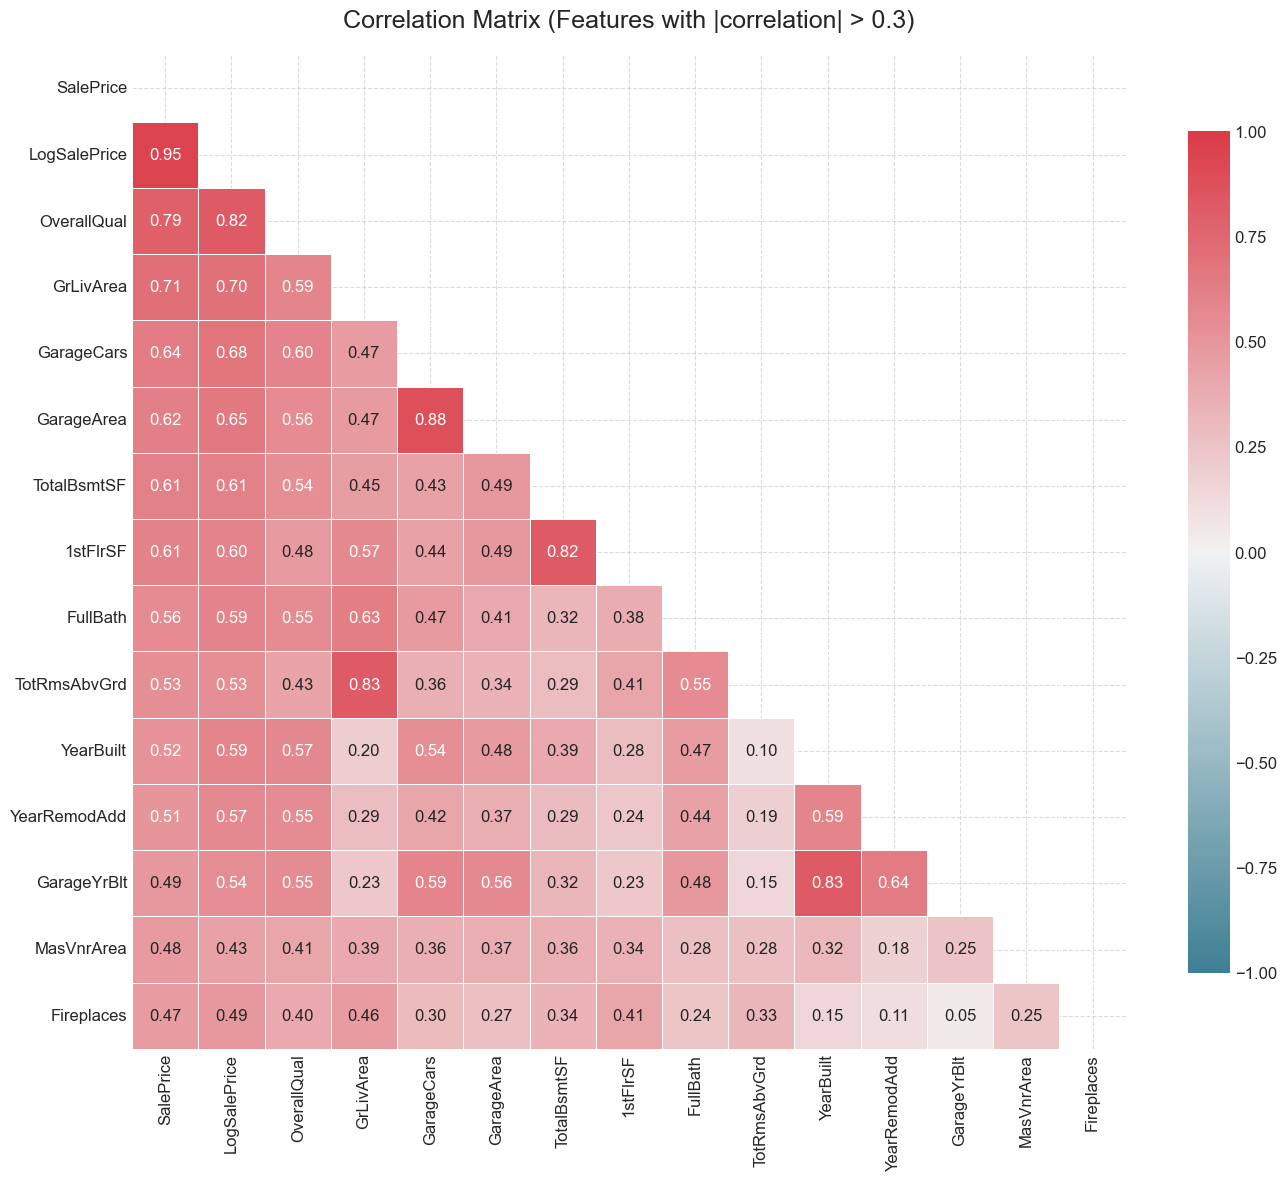

In [17]:
# Plot correlation matrix
# Select top correlated features for better visualization
top_corr_features = correlations.abs().sort_values(ascending=False).head(15).index
top_corr_df = numeric_df[top_corr_features]

fig = plot_correlation_matrix(top_corr_df, threshold=0.3, target_column='SalePrice')
plt.show()

## 5. Categorical Features Analysis

Let's analyze the distribution of important categorical features and their relationship with the target variable.

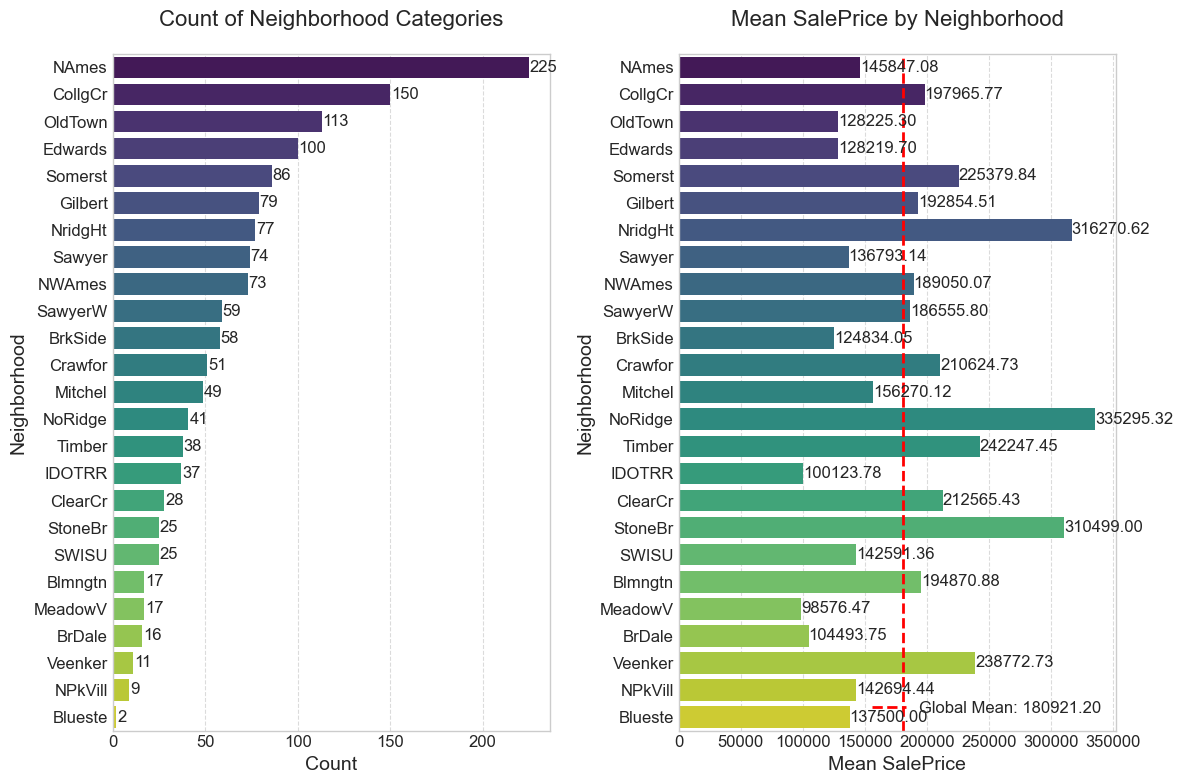

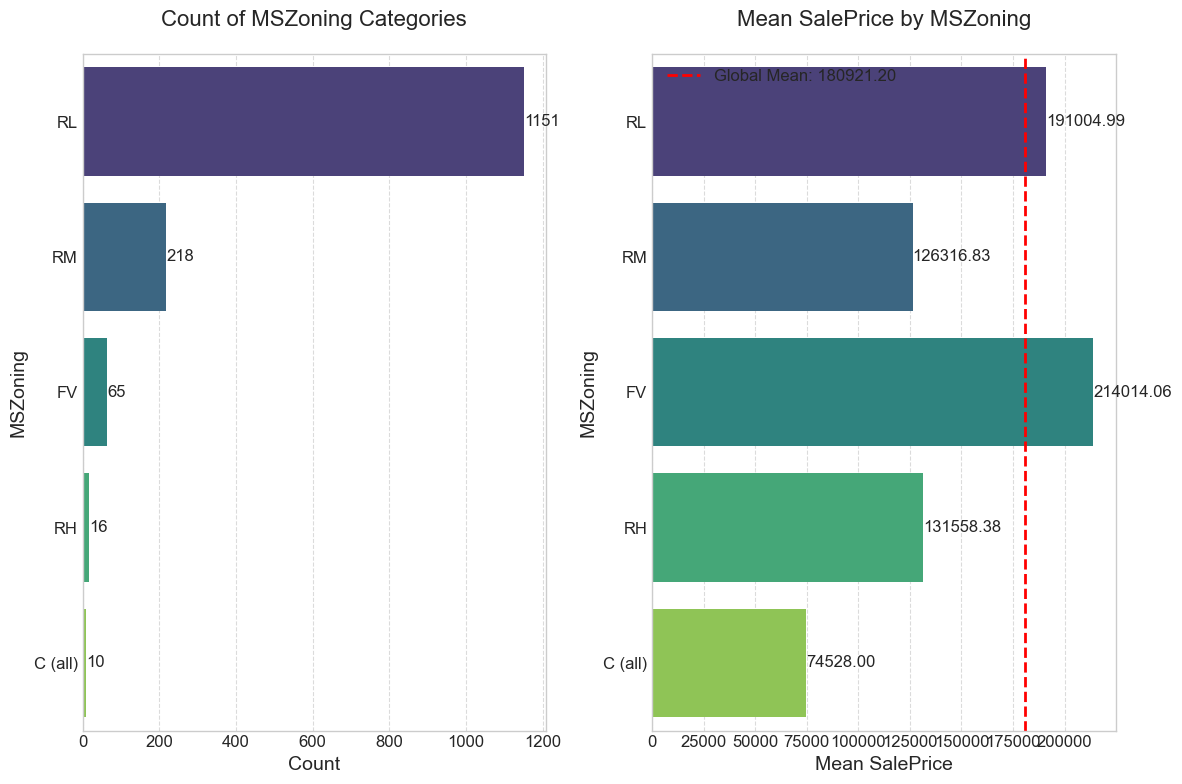

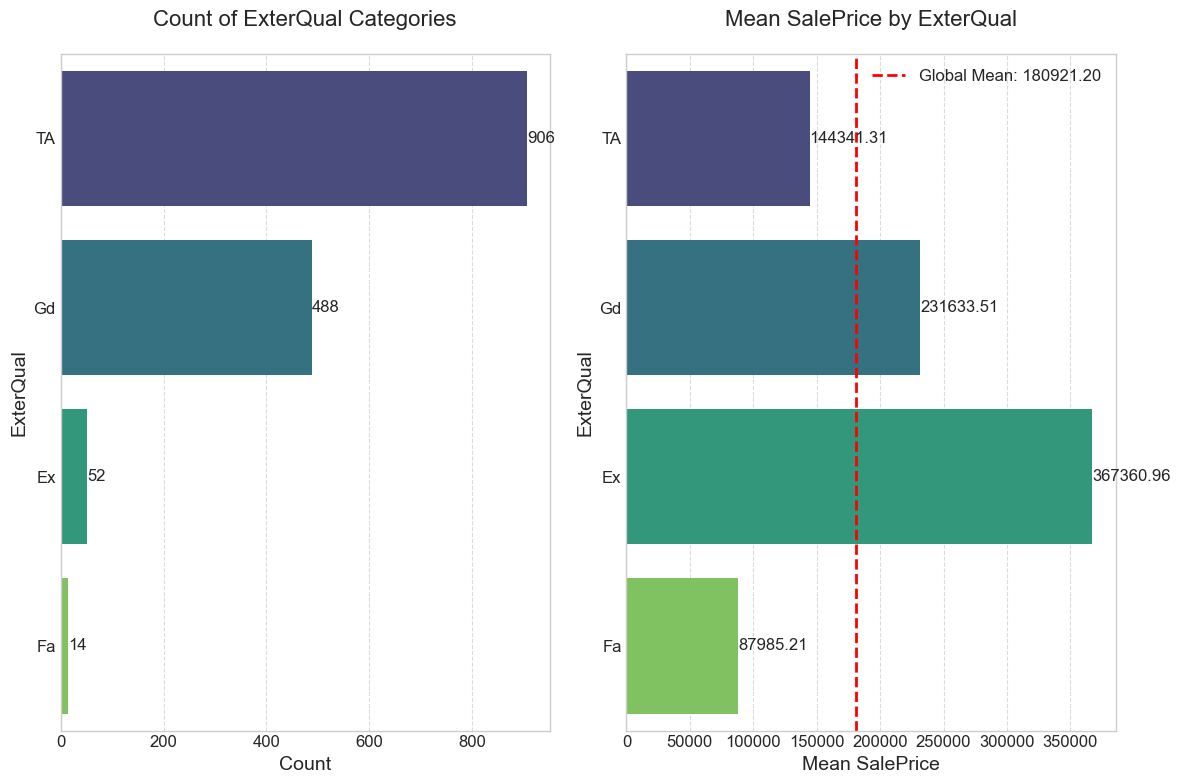

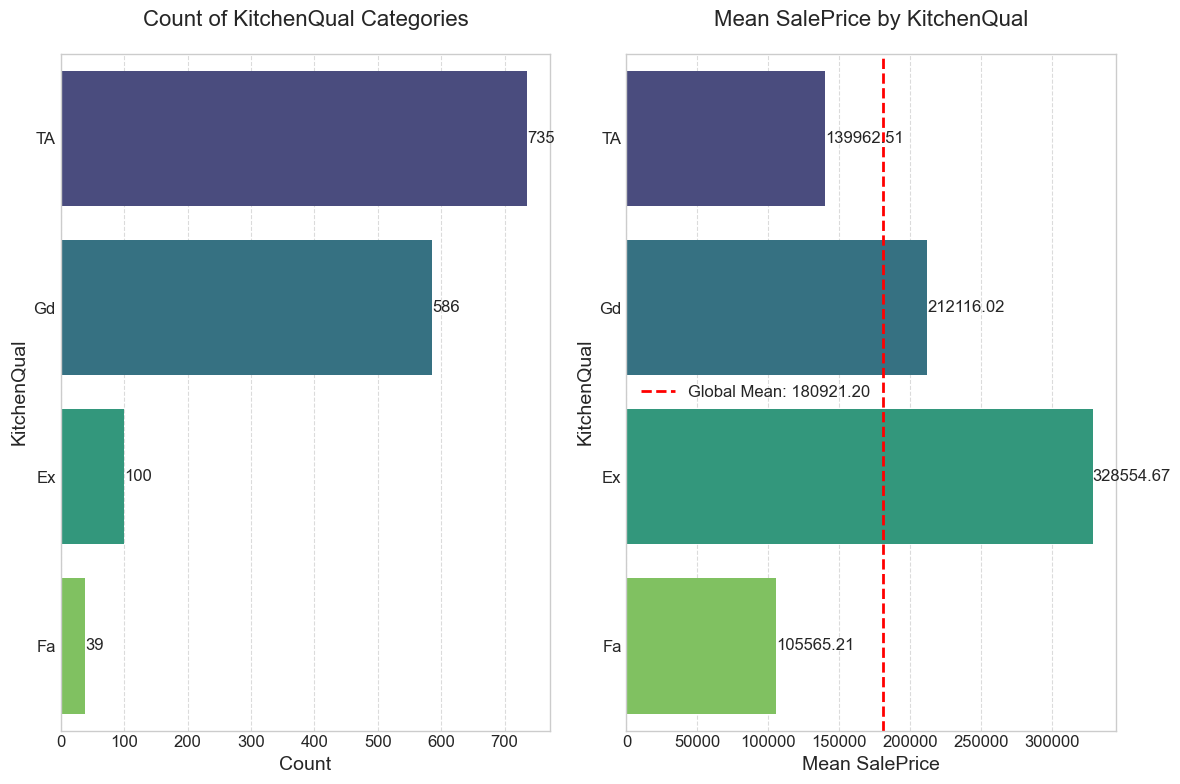

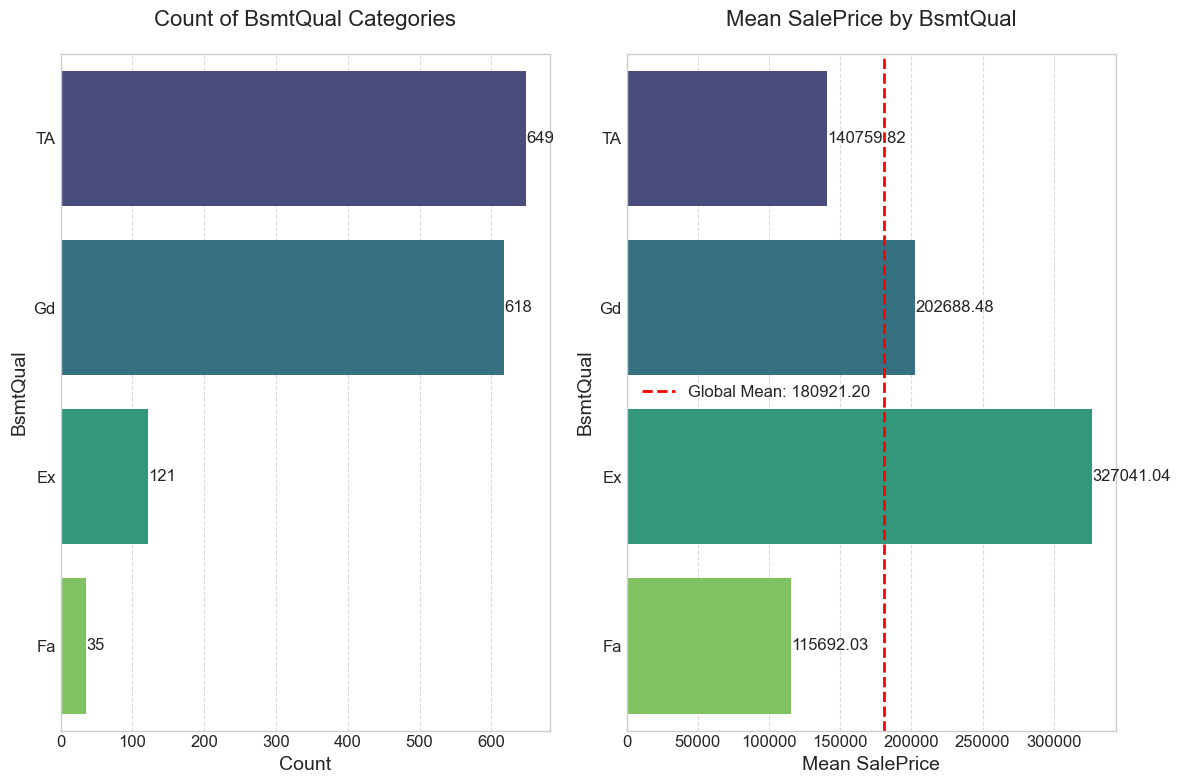

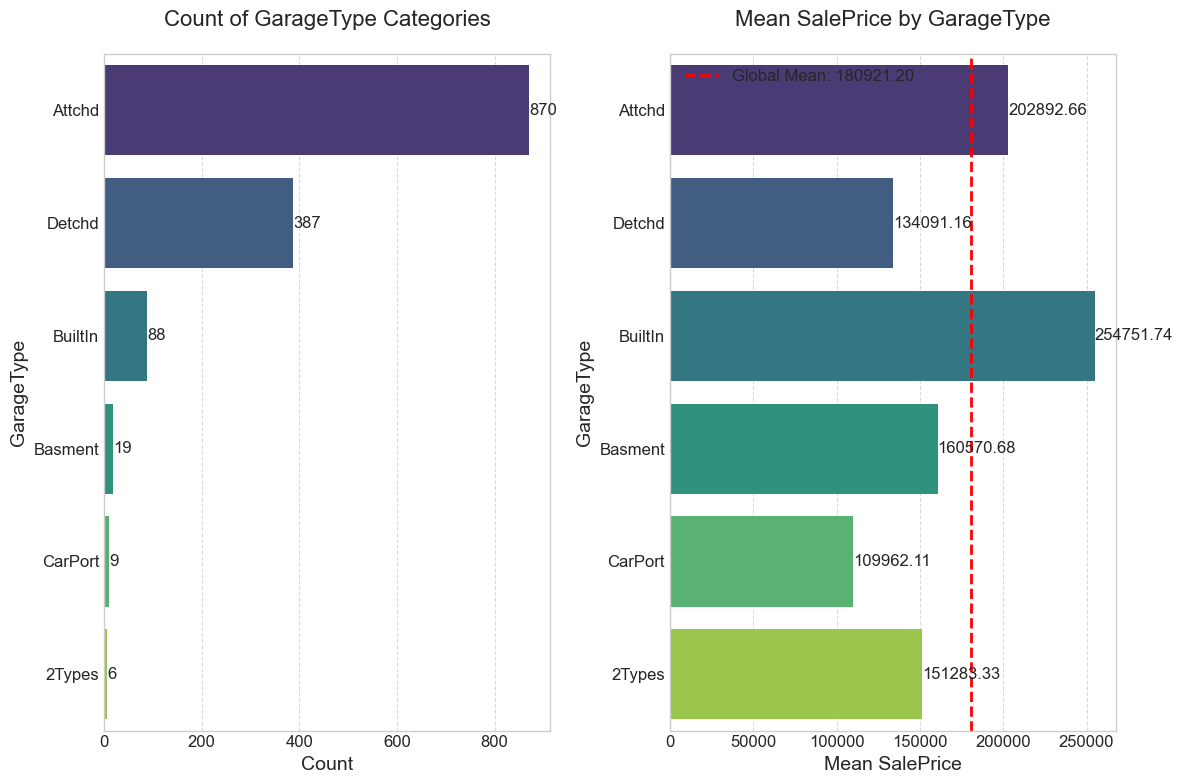

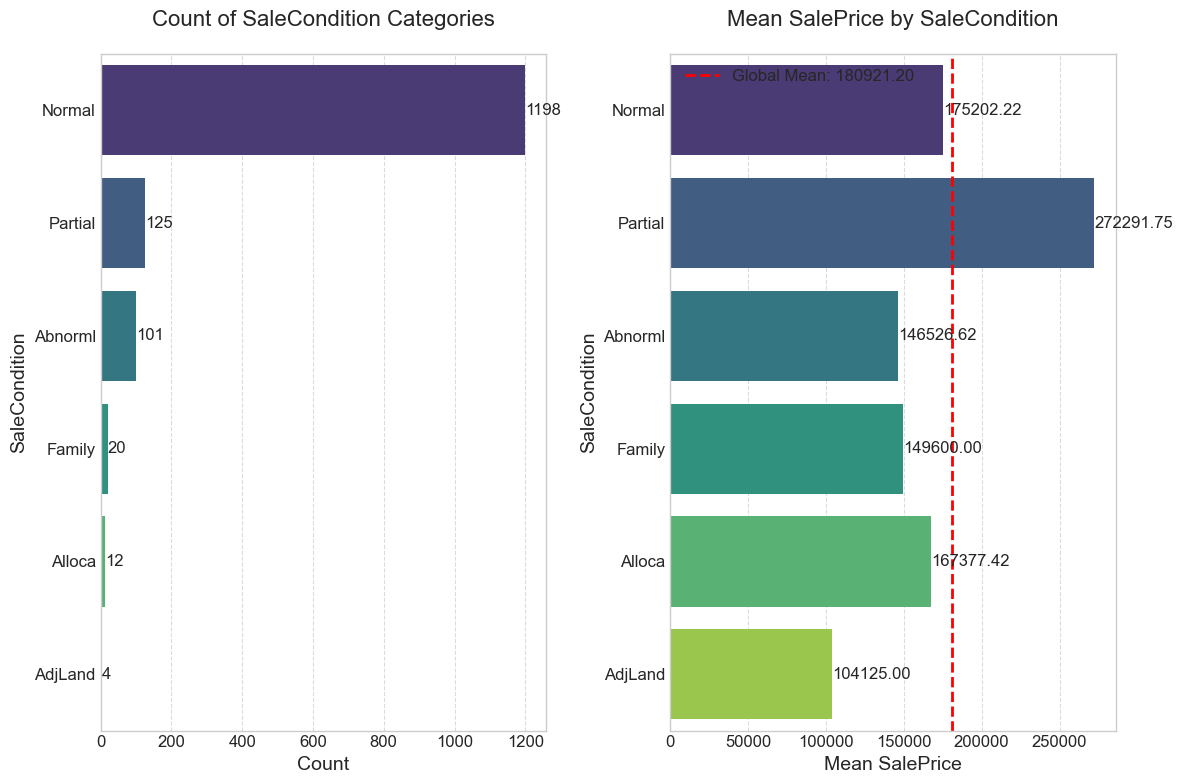

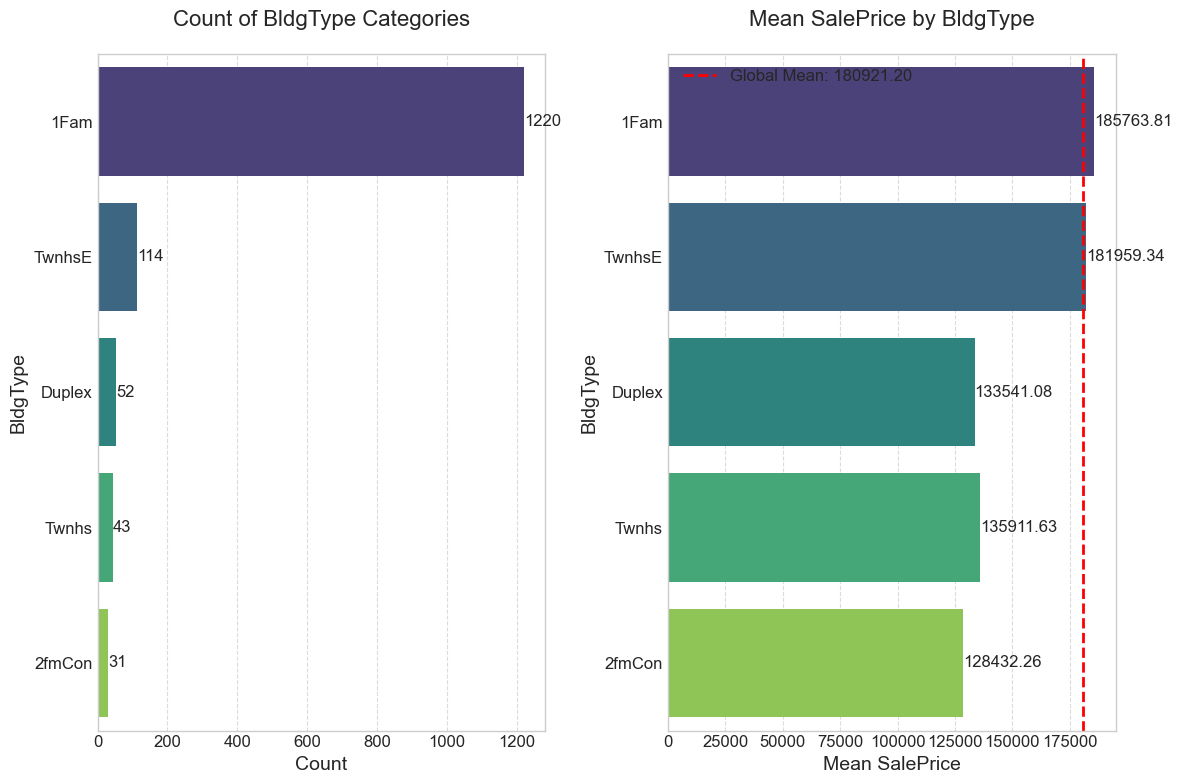

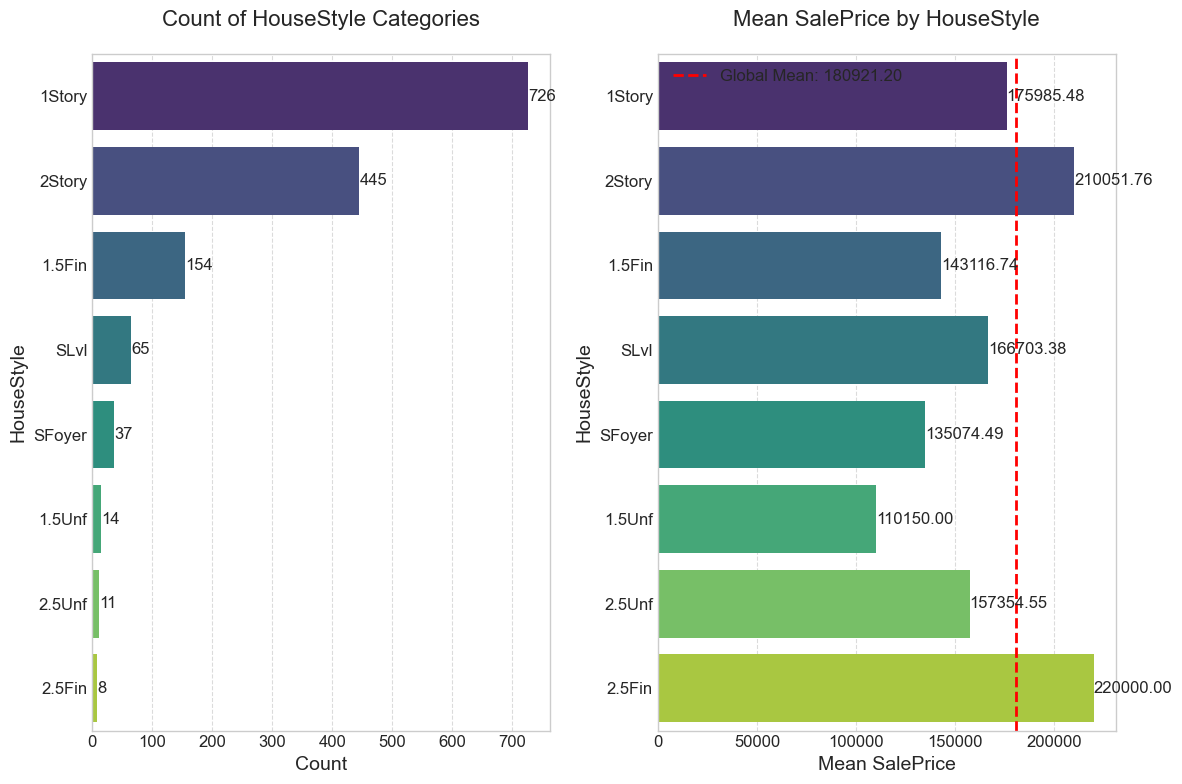

In [18]:
# Select important categorical features
important_categorical_features = [
    'Neighborhood', 'MSZoning', 'ExterQual', 'KitchenQual', 
    'BsmtQual', 'GarageType', 'SaleCondition', 'BldgType', 'HouseStyle'
]

# Filter to only include features that exist in the dataframe
categorical_features = [col for col in important_categorical_features if col in train_df.columns]

# Plot distribution of each categorical feature with relation to SalePrice
for feature in categorical_features:
    fig = plot_categorical_distribution(train_df, feature, target_column='SalePrice')
    plt.show()

Average house prices by neighborhood:
                       mean    median  count            std         cv
Neighborhood                                                          
NoRidge       335295.317073  301500.0     41  121412.658640  36.210663
NridgHt       316270.623377  315000.0     77   96392.544954  30.477869
StoneBr       310499.000000  278000.0     25  112969.676640  36.383266
Timber        242247.447368  228475.0     38   64845.651549  26.768353
Veenker       238772.727273  218000.0     11   72369.317959  30.308871
Somerst       225379.837209  225500.0     86   56177.555888  24.925724
ClearCr       212565.428571  200250.0     28   50231.538993  23.631095
Crawfor       210624.725490  200624.0     51   68866.395472  32.696254
CollgCr       197965.773333  197200.0    150   51403.666438  25.965936
Blmngtn       194870.882353  191000.0     17   30393.229219  15.596599
Gilbert       192854.506329  181000.0     79   35986.779085  18.660066
NWAmes        189050.068493  182900.0  

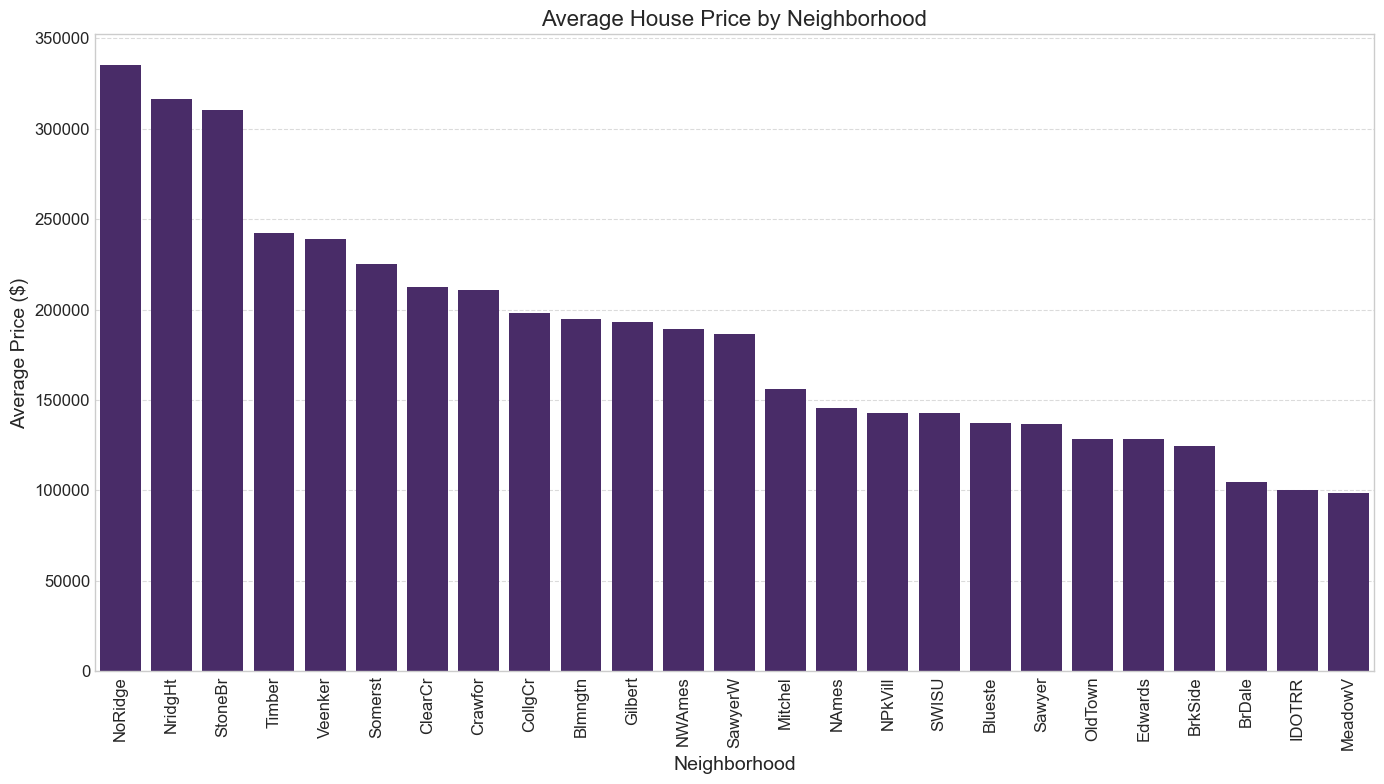

In [19]:
# Calculate average SalePrice by neighborhood
if 'Neighborhood' in train_df.columns:
    neighborhood_price = train_df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count', 'std'])
    neighborhood_price = neighborhood_price.sort_values('mean', ascending=False)
    
    # Calculate coefficient of variation (CV) to measure price variability within neighborhoods
    neighborhood_price['cv'] = neighborhood_price['std'] / neighborhood_price['mean'] * 100
    
    print("Average house prices by neighborhood:")
    print(neighborhood_price)
    
    # Plot average price by neighborhood
    plt.figure(figsize=(14, 8))
    sns.barplot(x=neighborhood_price.index, y=neighborhood_price['mean'])
    plt.xticks(rotation=90)
    plt.title('Average House Price by Neighborhood')
    plt.ylabel('Average Price ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [20]:
# Analyze relationship between quality features and SalePrice
quality_features = ['OverallQual', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageQual']
quality_features = [col for col in quality_features if col in train_df.columns]

if quality_features:
    # Create a figure with subplots
    fig, axes = plt.subplots(len(quality_features), 1, figsize=(12, 4*len(quality_features)))
    
    # If only one feature, axes is not an array
    if len(quality_features) == 1:
        axes = [axes]
    
    for i, feature in enumerate(quality_features):
        # Group by quality and calculate mean SalePrice
        quality_price = train_df.groupby(feature)['SalePrice'].mean().reset_index()
        
        # Plot
        sns.barplot(x=feature, y='SalePrice', data=quality_price, ax=axes[i])
        axes[i].set_title(f'Average SalePrice by {feature}')
        axes[i].set_ylabel('Average Price ($)')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

## 6. Feature Group Analysis

Let's analyze features by their logical groups.

In [21]:
# Get feature groups
feature_groups = get_feature_groups()

# Calculate average correlation by feature group
group_correlations = {}

for group_name, features in feature_groups.items():
    # Filter to only include features that exist in the dataframe and are numeric
    numeric_features = [col for col in features if col in numeric_df.columns]
    
    if numeric_features:
        # Calculate average absolute correlation with SalePrice
        group_corr = numeric_df[numeric_features].corrwith(numeric_df['SalePrice']).abs().mean()
        group_correlations[group_name] = group_corr

# Sort groups by average correlation
sorted_groups = sorted(group_correlations.items(), key=lambda x: x[1], reverse=True)

# Plot average correlation by feature group
plt.figure(figsize=(12, 8))
sns.barplot(x=[group[0] for group in sorted_groups], y=[group[1] for group in sorted_groups])
plt.title('Average Absolute Correlation with SalePrice by Feature Group')
plt.ylabel('Average Absolute Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Bivariate Analysis

Let's analyze the relationship between pairs of important features.

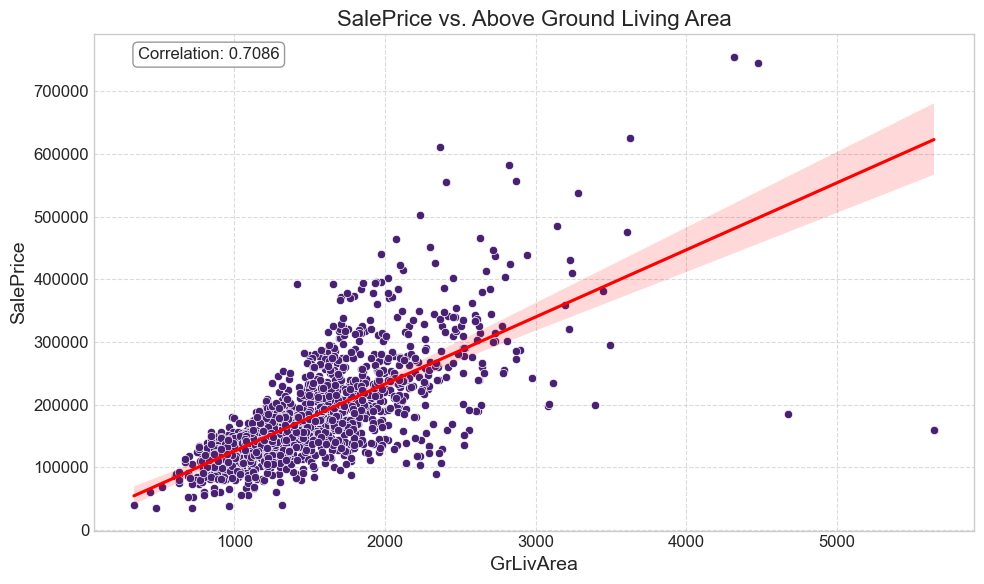

In [22]:
# Analyze relationship between living area and price
if 'GrLivArea' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
    plt.title('SalePrice vs. Above Ground Living Area')
    plt.xlabel('Above Ground Living Area (sq ft)')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add regression line
    sns.regplot(x='GrLivArea', y='SalePrice', data=train_df, scatter=False, color='red')
    
    # Calculate correlation
    corr = train_df['GrLivArea'].corr(train_df['SalePrice'])
    plt.annotate(f'Correlation: {corr:.4f}', xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

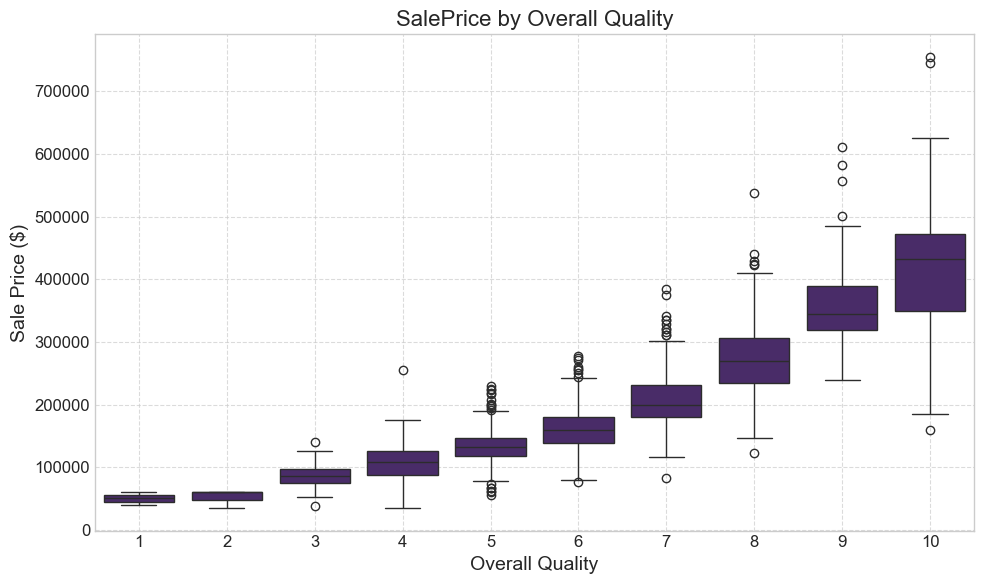

In [23]:
# Analyze relationship between overall quality and price
if 'OverallQual' in train_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
    plt.title('SalePrice by Overall Quality')
    plt.xlabel('Overall Quality')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

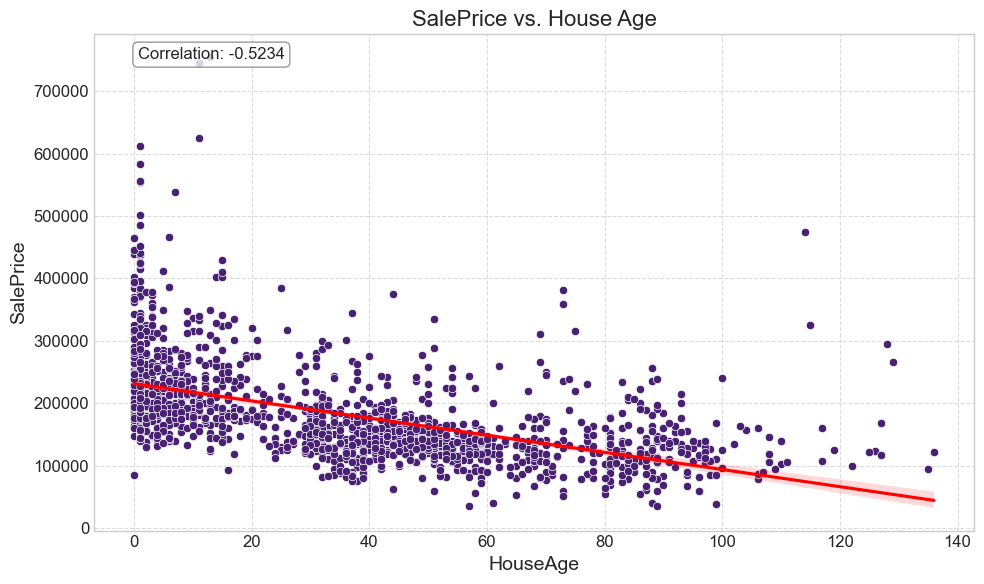

In [25]:
# Analyze relationship between house age and price
if 'YearBuilt' in train_df.columns:
    # Calculate house age
    if 'YrSold' in train_df.columns:
        train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
    else:
        # If YrSold is not available, use the most recent year in the dataset
        train_df['HouseAge'] = train_df['YearBuilt'].max() - train_df['YearBuilt']
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='HouseAge', y='SalePrice', data=train_df)
    plt.title('SalePrice vs. House Age')
    plt.xlabel('House Age (years)')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add regression line
    sns.regplot(x='HouseAge', y='SalePrice', data=train_df, scatter=False, color='red')
    
    # Calculate correlation
    corr = train_df['HouseAge'].corr(train_df['SalePrice'])
    plt.annotate(f'Correlation: {corr:.4f}', xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()

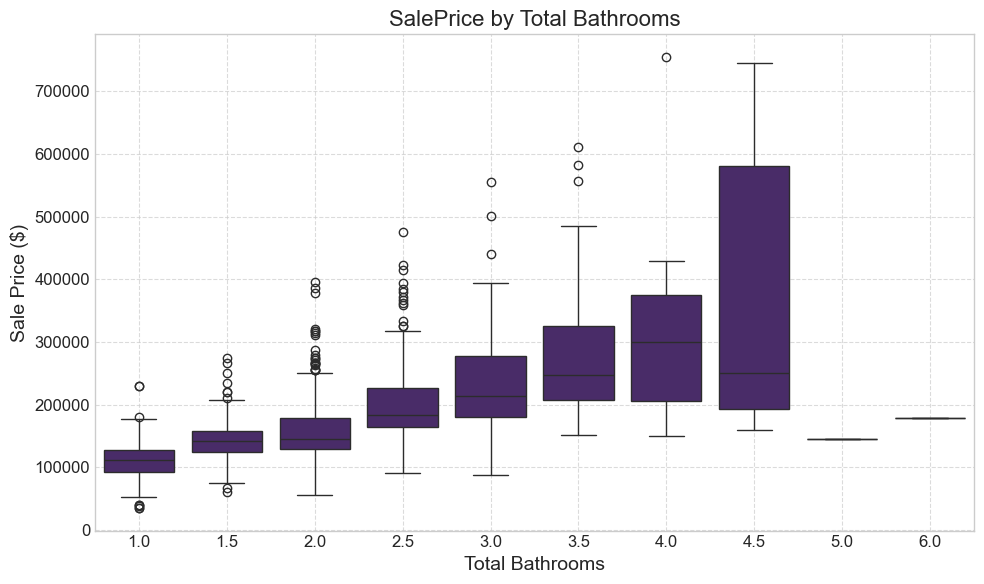

In [26]:
# Analyze relationship between total bathrooms and price
bathroom_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
bathroom_cols = [col for col in bathroom_cols if col in train_df.columns]

if bathroom_cols:
    # Calculate total bathrooms
    train_df['TotalBathrooms'] = train_df['FullBath']
    
    if 'HalfBath' in bathroom_cols:
        train_df['TotalBathrooms'] += 0.5 * train_df['HalfBath']
    
    if 'BsmtFullBath' in bathroom_cols:
        train_df['TotalBathrooms'] += train_df['BsmtFullBath']
    
    if 'BsmtHalfBath' in bathroom_cols:
        train_df['TotalBathrooms'] += 0.5 * train_df['BsmtHalfBath']
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TotalBathrooms', y='SalePrice', data=train_df)
    plt.title('SalePrice by Total Bathrooms')
    plt.xlabel('Total Bathrooms')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 8. Multivariate Analysis

Let's analyze the relationship between multiple features and the target variable.

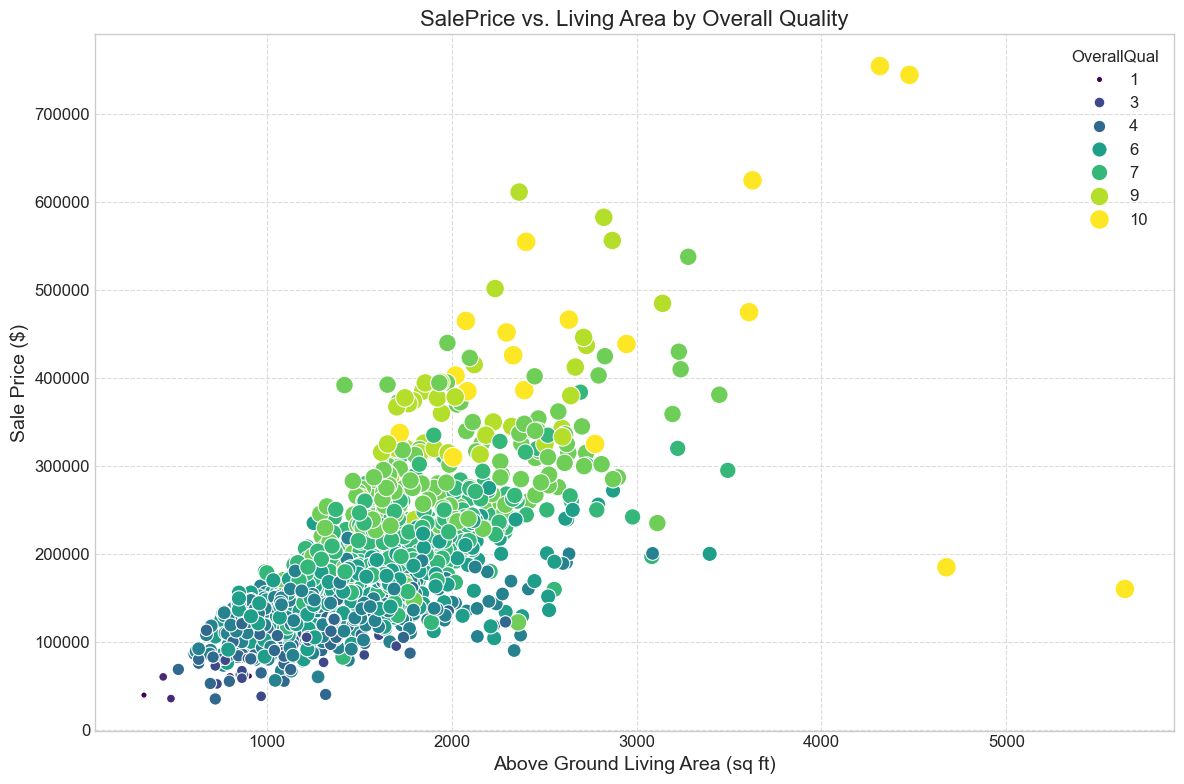

In [27]:
# Analyze relationship between living area, overall quality, and price
if 'GrLivArea' in train_df.columns and 'OverallQual' in train_df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', 
                    palette='viridis', size='OverallQual', sizes=(20, 200),
                    data=train_df)
    plt.title('SalePrice vs. Living Area by Overall Quality')
    plt.xlabel('Above Ground Living Area (sq ft)')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

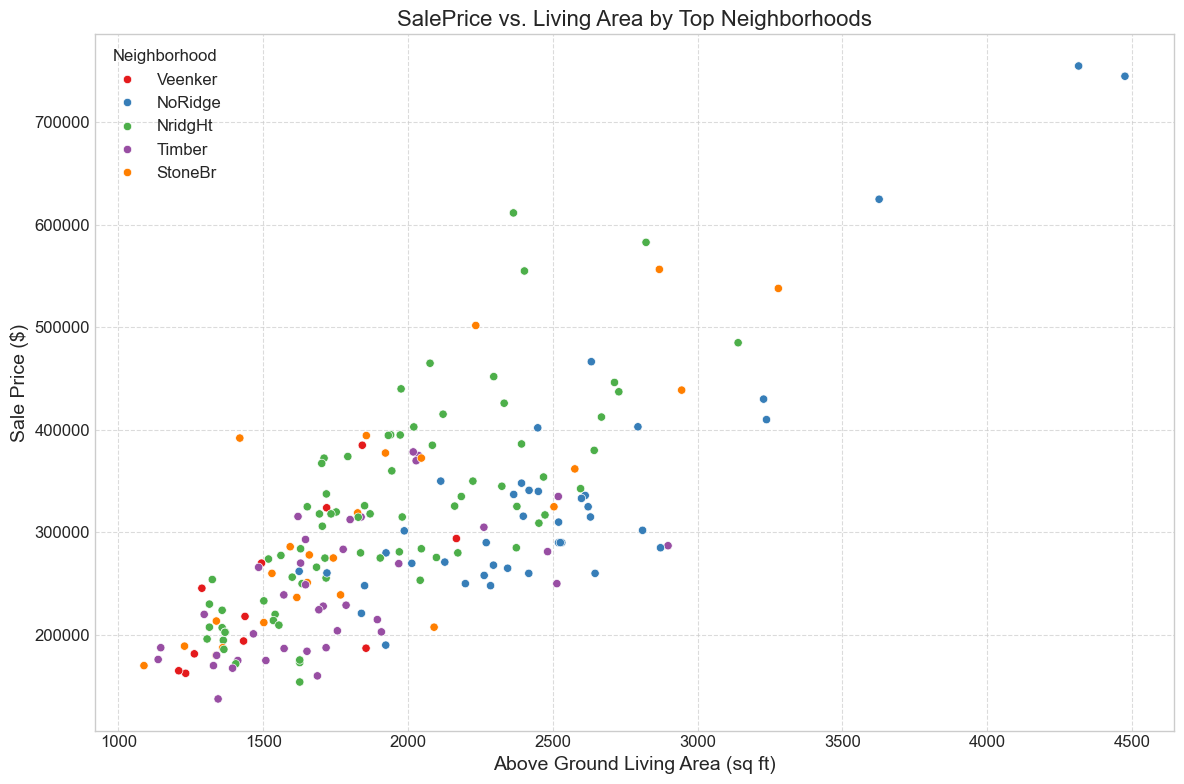

In [28]:
# Analyze relationship between neighborhood, living area, and price
if 'GrLivArea' in train_df.columns and 'Neighborhood' in train_df.columns:
    # Get top 5 neighborhoods by average price
    top_neighborhoods = train_df.groupby('Neighborhood')['SalePrice'].mean().nlargest(5).index.tolist()
    
    # Filter data to include only top neighborhoods
    top_neighborhood_data = train_df[train_df['Neighborhood'].isin(top_neighborhoods)]
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Neighborhood', 
                    palette='Set1', data=top_neighborhood_data)
    plt.title('SalePrice vs. Living Area by Top Neighborhoods')
    plt.xlabel('Above Ground Living Area (sq ft)')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

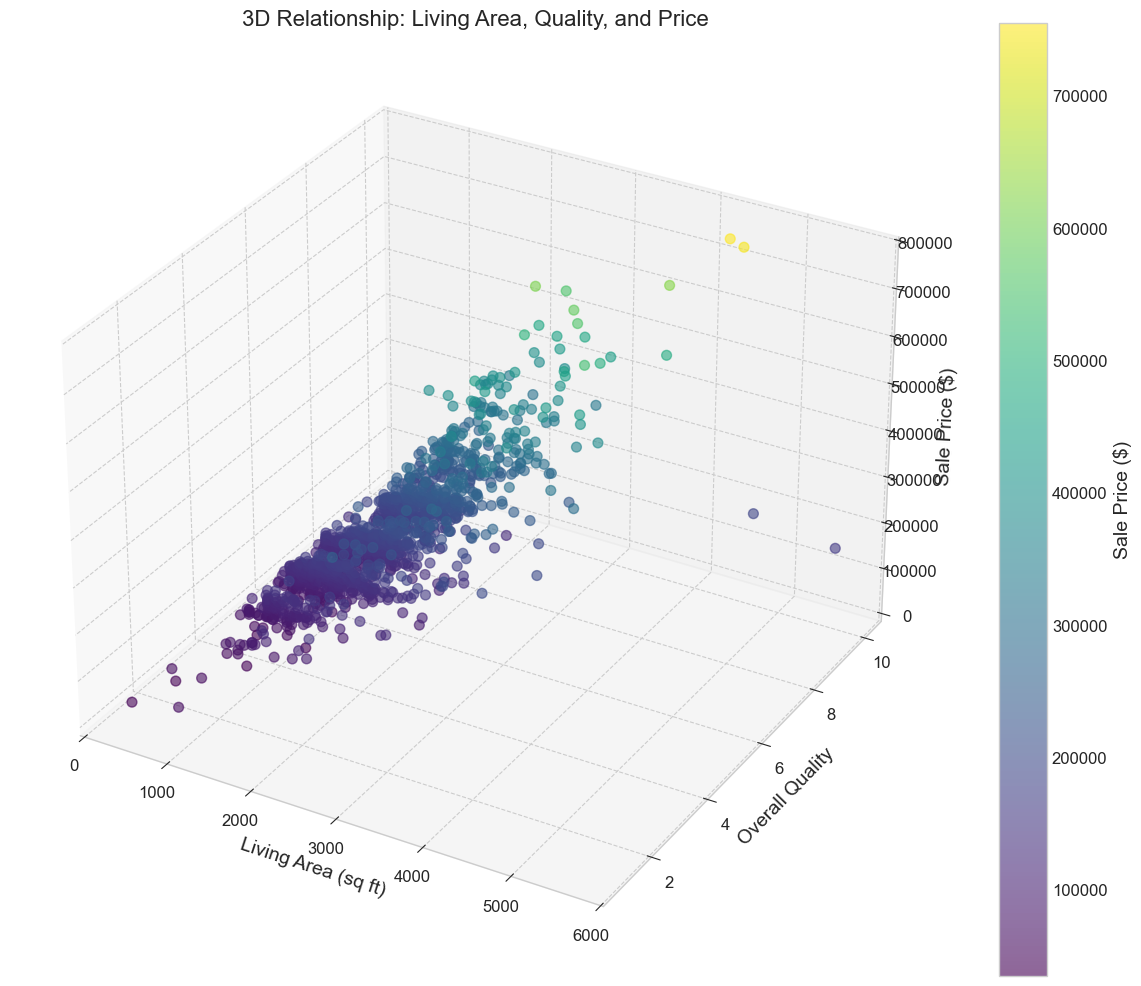

In [29]:
# Create a 3D plot to visualize relationship between living area, quality, and price
if 'GrLivArea' in train_df.columns and 'OverallQual' in train_df.columns:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create scatter plot
    scatter = ax.scatter(
        train_df['GrLivArea'],
        train_df['OverallQual'],
        train_df['SalePrice'],
        c=train_df['SalePrice'],
        cmap='viridis',
        s=50,
        alpha=0.6
    )
    
    # Add labels
    ax.set_xlabel('Living Area (sq ft)')
    ax.set_ylabel('Overall Quality')
    ax.set_zlabel('Sale Price ($)')
    ax.set_title('3D Relationship: Living Area, Quality, and Price')
    
    # Add color bar
    plt.colorbar(scatter, ax=ax, label='Sale Price ($)')
    
    plt.tight_layout()
    plt.show()

## 9. Key Findings and Insights

Based on the exploratory data analysis, here are the key findings:

In [30]:
# Create a summary of key findings
key_findings = [
    "The SalePrice distribution is right-skewed, indicating many lower-priced homes and fewer high-priced homes.",
    "Log transformation of SalePrice creates a more normal distribution, which is better for modeling.",
    "Overall Quality (OverallQual) has the strongest correlation with SalePrice.",
    "Above Ground Living Area (GrLivArea) is strongly correlated with SalePrice.",
    "Newer homes tend to sell for higher prices than older homes.",
    "Neighborhoods have a significant impact on house prices, with some neighborhoods commanding much higher prices.",
    "Quality features (ExterQual, KitchenQual, etc.) show strong relationships with SalePrice.",
    "The number of bathrooms is positively associated with house prices.",
    "There's a strong interaction effect between living area and overall quality on price.",
    "Some features have missing values that need to be addressed in preprocessing."
]

# Display key findings
for i, finding in enumerate(key_findings, 1):
    print(f"{i}. {finding}")

1. The SalePrice distribution is right-skewed, indicating many lower-priced homes and fewer high-priced homes.
2. Log transformation of SalePrice creates a more normal distribution, which is better for modeling.
3. Overall Quality (OverallQual) has the strongest correlation with SalePrice.
4. Above Ground Living Area (GrLivArea) is strongly correlated with SalePrice.
5. Newer homes tend to sell for higher prices than older homes.
6. Neighborhoods have a significant impact on house prices, with some neighborhoods commanding much higher prices.
7. Quality features (ExterQual, KitchenQual, etc.) show strong relationships with SalePrice.
8. The number of bathrooms is positively associated with house prices.
9. There's a strong interaction effect between living area and overall quality on price.
10. Some features have missing values that need to be addressed in preprocessing.


## 10. Recommendations for Feature Engineering

Based on the EDA, here are recommendations for feature engineering:

In [31]:
# Create a summary of feature engineering recommendations
feature_engineering_recommendations = [
    "Create a total area feature by combining GrLivArea, TotalBsmtSF, and GarageArea.",
    "Create age-related features (house age, remodel age).",
    "Create quality-related features by combining various quality indicators.",
    "Create a total bathrooms feature.",
    "Create binary features for presence of pool, garage, basement, etc.",
    "Create neighborhood price level categories (high, medium, low).",
    "Create interaction features between quality and area.",
    "Apply log transformation to skewed numeric features.",
    "Create price per square foot feature for training data analysis.",
    "Create features for house style and type combinations."
]

# Display recommendations
for i, recommendation in enumerate(feature_engineering_recommendations, 1):
    print(f"{i}. {recommendation}")

1. Create a total area feature by combining GrLivArea, TotalBsmtSF, and GarageArea.
2. Create age-related features (house age, remodel age).
3. Create quality-related features by combining various quality indicators.
4. Create a total bathrooms feature.
5. Create binary features for presence of pool, garage, basement, etc.
6. Create neighborhood price level categories (high, medium, low).
7. Create interaction features between quality and area.
8. Apply log transformation to skewed numeric features.
9. Create price per square foot feature for training data analysis.
10. Create features for house style and type combinations.


## 11. Conclusion

This exploratory data analysis has provided valuable insights into the Ames Housing dataset. We've identified key features that influence house prices, examined relationships between variables, and discovered patterns that will guide our feature engineering and modeling approach.

The next steps are to:
1. Preprocess the data by handling missing values and encoding categorical features
2. Engineer new features based on the insights from this analysis
3. Build and evaluate regression models to predict house prices
4. Fine-tune the best performing models